# **Importing Libraries**



In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio
import numpy as np

# **Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

'Colab Notebooks'  'Getting started.pdf'


In [ ]:
original_dataset_dir = "/content/drive/MyDrive/Colab Notebooks/Cnn"
base_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2'
#os.mkdir(base_dir)

In [ ]:
total_john_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/total_john'
total_dawood_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/total_dawood'
train_John_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/train_John'
train_Dawood_dir = '/content/drive/My Drive/Colab Notebooks/working_directory2/train_Dawood'
#os.mkdir(total_john_dir)
#os.mkdir(total_dawood_dir)
#os.mkdir(train_John_dir)
#os.mkdir(train_Dawood_dir)

In [ ]:
# Base directories
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Subdirectories within train, validation, and test directories
train_john_dir = os.path.join(train_dir, 'john')
#os.mkdir(train_john_dir)

train_dawood_dir = os.path.join(train_dir, 'dawood')
#os.mkdir(train_dawood_dir)

validation_john_dir = os.path.join(validation_dir, 'john')
#os.mkdir(validation_john_dir)

validation_dawood_dir = os.path.join(validation_dir, 'dawood')
#os.mkdir(validation_dawood_dir)

test_john_dir = os.path.join(test_dir, 'john')
#os.mkdir(test_john_dir)

test_dawood_dir = os.path.join(test_dir, 'dawood')
#os.mkdir(test_dawood_dir)

In [ ]:
print('total training john images:', len(os.listdir(train_john_dir)))
print('total training dawood images:', len(os.listdir(train_dawood_dir)))
print('total validation john images:', len(os.listdir(validation_john_dir)))
print('total validation dawood images:', len(os.listdir(validation_dawood_dir)))
print('total testing John images:', len(os.listdir(test_john_dir)))
print('total testing Dawood images:', len(os.listdir(test_dawood_dir)))

total training john images: 113
total training dawood images: 113
total validation john images: 15
total validation dawood images: 15
total testing John images: 16
total testing Dawood images: 16


/content/drive/MyDrive/Colab Notebooks/Cnn/Dawood-6.jpg


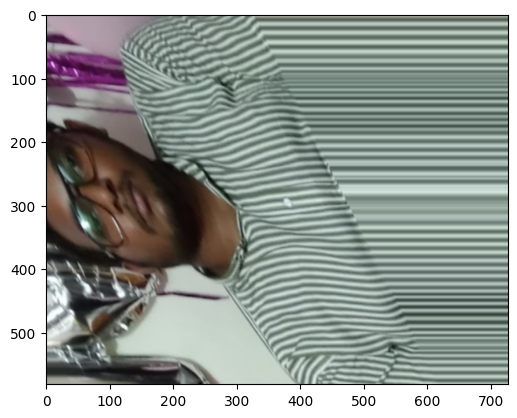

In [ ]:
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[11])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

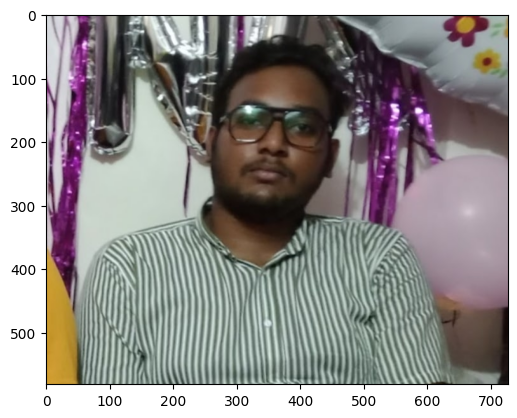

In [ ]:
plt.imshow(img);

In [ ]:
john_files = ['John-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in john_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(total_john_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(total_john_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [ ]:
Dawood_files = ['Dawood-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in Dawood_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(total_dawood_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(total_dawood_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [ ]:
print('total_dawood:', len(os.listdir(total_dawood_dir)))
print('total_john:', len(os.listdir(total_john_dir)))

total_dawood: 144
total_john: 144


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
all_files = [f for f in os.listdir(total_dawood_dir) if os.path.isfile(os.path.join(total_dawood_dir, f))]

In [ ]:
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [ ]:
def copy_files(file_list, src_dir, dst_dir):
    for fname in file_list:
        src_path = os.path.join(src_dir, fname)
        dst_path = os.path.join(dst_dir, fname)
        shutil.copyfile(src_path, dst_path)

In [ ]:
# Copy the files to the respective directories
copy_files(train_files, total_dawood_dir, train_Dawood_dir)
copy_files(test_files, total_dawood_dir, test_dawood_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_Dawood_dir))}')
print(f'Total testing images: {len(os.listdir(test_dawood_dir))}')

Total training images: 128
Total testing images: 16


In [ ]:
all_files = [f for f in os.listdir(total_john_dir) if os.path.isfile(os.path.join(total_john_dir, f))]

In [ ]:
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [ ]:
# Copy the files to the respective directories
copy_files(train_files, total_john_dir, train_John_dir)
copy_files(test_files, total_john_dir, test_john_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_John_dir))}')
print(f'Total testing images: {len(os.listdir(test_john_dir))}')

Total training images: 128
Total testing images: 16


In [ ]:
all_files = [f for f in os.listdir(train_Dawood_dir) if os.path.isfile(os.path.join(train_Dawood_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [ ]:
# Copy the files to the respective directories
copy_files(train_files, train_Dawood_dir, train_dawood_dir)
copy_files(test_files, train_Dawood_dir, validation_dawood_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_dawood_dir))}')
print(f'Total validation images: {len(os.listdir(validation_dawood_dir))}')

Total training images: 113
Total validation images: 15


In [ ]:
all_files = [f for f in os.listdir(train_John_dir) if os.path.isfile(os.path.join(train_John_dir, f))]
train_files, test_files = train_test_split(all_files, test_size=0.111, random_state=42)

In [ ]:
# Copy the files to the respective directories
copy_files(train_files, train_John_dir, train_john_dir)
copy_files(test_files, train_John_dir, validation_john_dir)

# Print out the number of files copied
print(f'Total training images: {len(os.listdir(train_john_dir))}')
print(f'Total validation images: {len(os.listdir(validation_john_dir))}')

Total training images: 113
Total validation images: 15


In [ ]:
print('total training John images:', len(os.listdir(train_john_dir)))
print('total training Dawood images:', len(os.listdir(train_dawood_dir)))
print('total validation John images:', len(os.listdir(validation_john_dir)))
print('total validation Dawood images:', len(os.listdir(validation_dawood_dir)))
print('total testing John images:', len(os.listdir(test_john_dir)))
print('total testing Dawood images:', len(os.listdir(test_dawood_dir)))

total training John images: 113
total training Dawood images: 113
total validation John images: 15
total validation Dawood images: 15
total testing John images: 16
total testing Dawood images: 16


# **Model Building**

In [ ]:
model_01 = models.Sequential()

#convolutional base
model_01.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model_01.add(layers.MaxPooling2D((2, 2)))

model_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_01.add(layers.MaxPooling2D((2, 2)))

model_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_01.add(layers.MaxPooling2D((2, 2)))

model_01.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_01.add(layers.MaxPooling2D((2, 2)))

#Flatten
model_01.add(layers.Flatten())

#Dense classifier
model_01.add(layers.Dense(512, activation='relu'))
model_01.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_01.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

**Optimizer**

In [ ]:
from tensorflow.keras import optimizers

model_01.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# **Fitting**

In [ ]:
history = model_01.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/100 ━━━━━━━━━━━━━━━━━━━━ 1:24 964ms/step - acc: 0.4484 - loss: 0.7148

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - acc: 0.4627 - loss: 0.7105 - val_acc: 0.5333 - val_loss: 0.6824
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - acc: 0.5351 - loss: 0.6936 - val_acc: 0.7000 - val_loss: 0.6765
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - acc: 0.5766 - loss: 0.6808 - val_acc: 0.5000 - val_loss: 0.6770
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 236ms/step - acc: 0.5398 - loss: 0.6816 - val_acc: 0.7333 - val_loss: 0.6655
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - acc: 0.5557 - loss: 0.6692 - val_acc: 0.7667 - val_loss: 0.6611
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - acc: 0.6434 - loss: 0.6482 - val_acc: 0.5000 - val_loss: 0.7201
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - acc: 0.6912 - loss: 0.6282 - val_acc: 0.6333 - val_loss: 0.6363
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - acc: 0.7094 - loss: 0.6190 - val_acc: 0.6333 - val_loss: 0.6245
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s

# **Model Saving**

In [ ]:
model_01.save('cnn.h5')

# **Plotting**

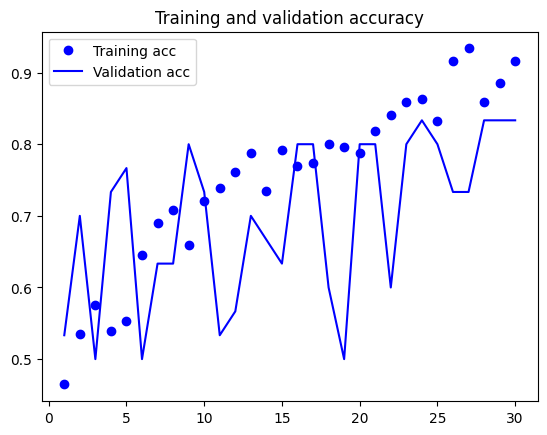

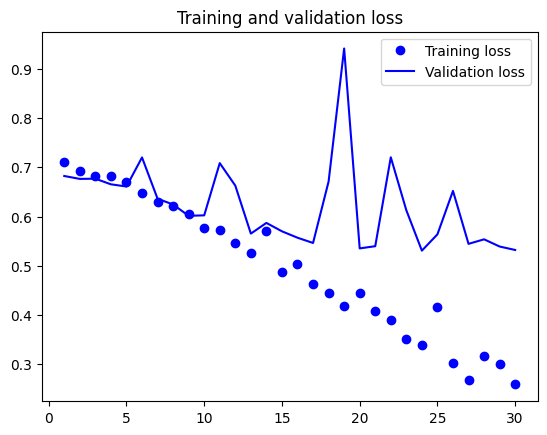

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Data augmentation by ImageDataGenerator**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# **Displaying some random images after augmentation**

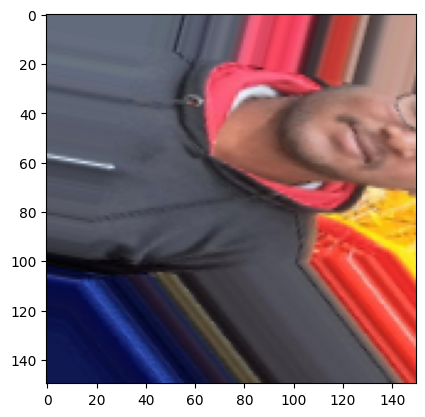

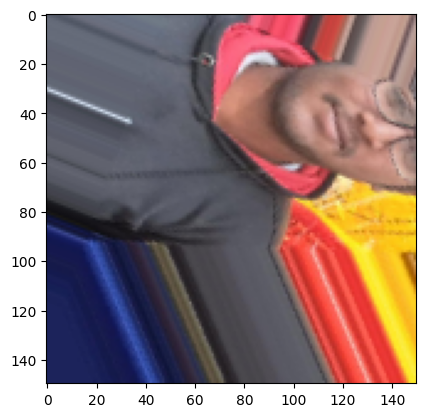

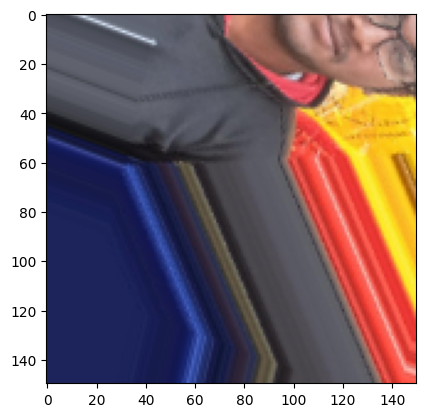

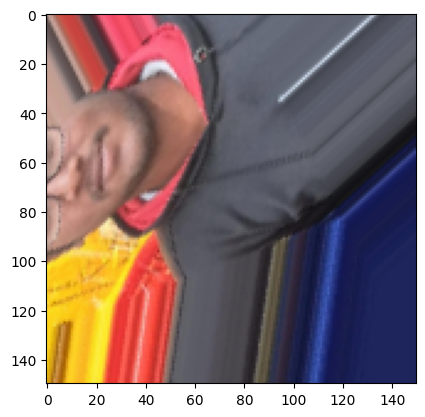

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_dawood_dir, fname) for fname in os.listdir(train_dawood_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# **New Model includes dropout**

In [ ]:
model_02 = models.Sequential()
model_02.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model_02.add(layers.MaxPooling2D((2, 2)))
model_02.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_02.add(layers.MaxPooling2D((2, 2)))
model_02.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_02.add(layers.MaxPooling2D((2, 2)))
model_02.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_02.add(layers.MaxPooling2D((2, 2)))
model_02.add(layers.Flatten())
model_02.add(layers.Dropout(0.5))
model_02.add(layers.Dense(512, activation='relu'))
model_02.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_02.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

# **Trainning using data augmentation generators**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# **Fitting**

In [ ]:
history = model_02.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - acc: 0.5233 - loss: 0.6881 - val_acc: 0.5000 - val_loss: 0.6911
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - acc: 0.5332 - loss: 0.6912 - val_acc: 0.5333 - val_loss: 0.6837
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - acc: 0.5440 - loss: 0.6883 - val_acc: 0.5333 - val_loss: 0.6821
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - acc: 0.5803 - loss: 0.6837 - val_acc: 0.5333 - val_loss: 0.6810
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - acc: 0.5870 - loss: 0.6783 - val_acc: 0.5000 - val_loss: 0.6893
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - acc: 0.5642 - loss: 0.6753 - val_acc: 0.6000 - val_loss: 0.6688
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - acc: 0.6090 - loss: 0.6715 - val_acc: 0.6667 - val_loss: 0.6564
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - acc: 0.6734 - loss: 0.6692 - val_acc: 0.6000 - val_loss: 0.6545
Epoch 9/100
100/100 ━━━━

# **Saving Model 2**

In [ ]:
model_02.save('CNN2.h5')

# **Plotting**

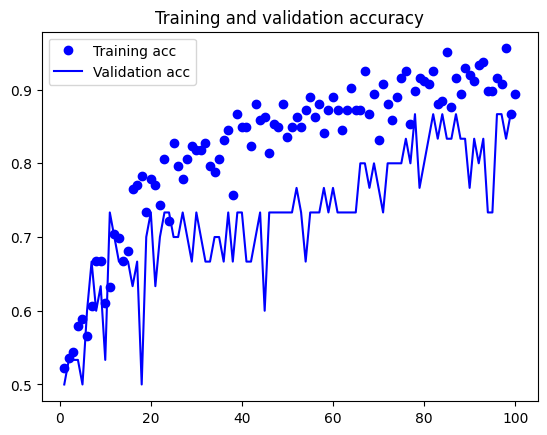

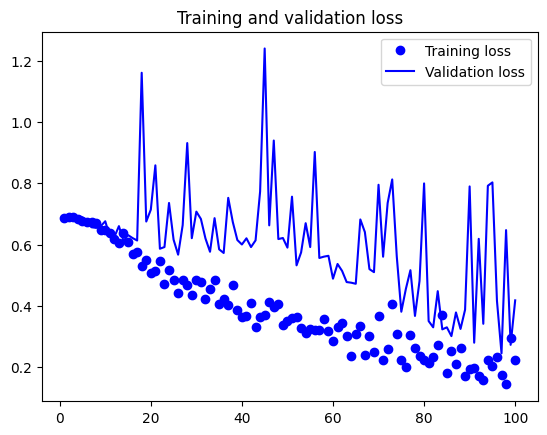

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION**


In [20]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 226)
validation_features, validation_labels = extract_features(validation_dir, 30)
test_features, test_labels = extract_features(test_dir, 32)

Found 226 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Found 30 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Found 32 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
train_features = np.reshape(train_features, (226, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (30, 4 * 4 * 512))
test_features = np.reshape(test_features, (32, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
model_03 = models.Sequential()
model_03.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model_03.add(layers.Dropout(0.5))
model_03.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_03.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,097,665 (8.00 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile
model_03.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [ ]:
history = model_03.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.5633 - loss: 0.7476 - val_acc: 0.6000 - val_loss: 0.6456
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.6221 - loss: 0.6688 - val_acc: 0.6667 - val_loss: 0.6025
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.7375 - loss: 0.5111 - val_acc: 0.6667 - val_loss: 0.5523
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.6976 - loss: 0.5790 - val_acc: 0.7000 - val_loss: 0.5259
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.7938 - loss: 0.5101 - val_acc: 0.7000 - val_loss: 0.5004
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - acc: 0.8089 - loss: 0.4394 - val_acc: 0.7667 - val_loss: 0.4899
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - acc: 0.7738 - loss: 0.4577 - val_acc: 0.7333 - val_loss: 0.4621
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - acc: 0.8334 - loss: 0.4108 - val_acc: 0.7667 - val_loss: 0.4452
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.8746

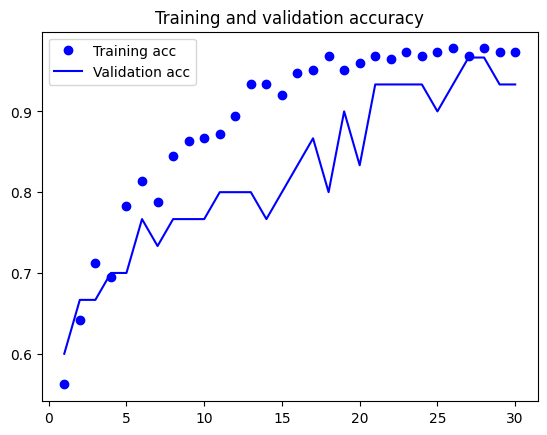

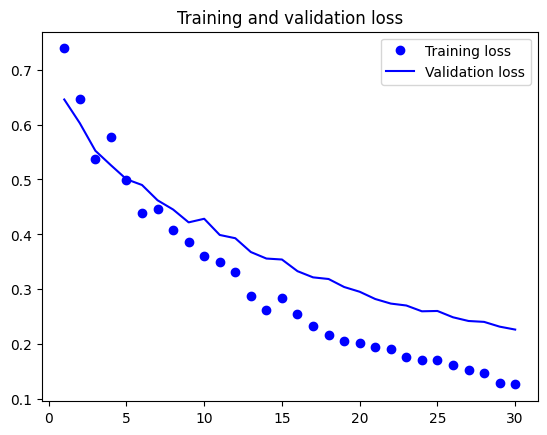

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
model_03.save('CNN3.h5')

# **FEATURE EXTRACTION WITH DATA AUGMENTATION**

In [21]:
model_03 = models.Sequential()
model_03.add(conv_base)
model_03.add(layers.Flatten())
model_03.add(layers.Dense(256, activation='relu'))
model_03.add(layers.Dense(1, activation='sigmoid'))

**Freezing**

In [22]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model_03.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model_03.trainable_weights))



This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [23]:


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 226 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [24]:
model_03.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [25]:
history = model_03.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 567ms/step - acc: 0.5897 - loss: 0.6622 - val_acc: 0.6667 - val_loss: 0.6302
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 581ms/step - acc: 0.6811 - loss: 0.6172 - val_acc: 0.6333 - val_loss: 0.5893
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 573ms/step - acc: 0.7266 - loss: 0.5595 - val_acc: 0.7000 - val_loss: 0.5526
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 554ms/step - acc: 0.7531 - loss: 0.5292 - val_acc: 0.7000 - val_loss: 0.5482
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 594ms/step - acc: 0.7604 - loss: 0.5259 - val_acc: 0.8000 - val_loss: 0.5033
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 576ms/step - acc: 0.7885 - loss: 0.5019 - val_acc: 0.7667 - val_loss: 0.4839
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 577ms/step - acc: 0.7843 - loss: 0.4810 - val_acc: 0.8333 - val_loss: 0.4582
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 611ms/step - acc: 0.8072 - loss: 0.4751 - val_acc: 0.8333 - val_loss: 0.4384
Epoch 9/30
100/100 ━━━━━━━━━━━━━

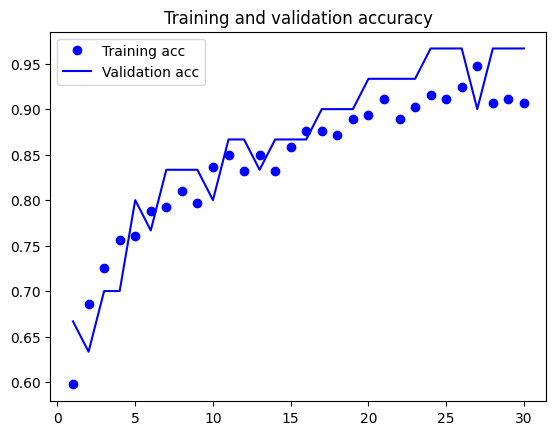

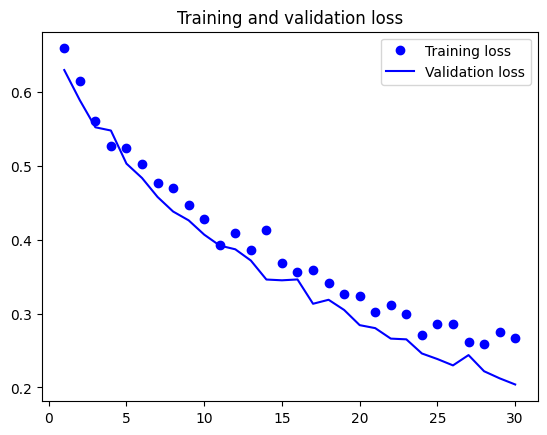

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
model_03.save('CNN4.h5')